In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [62]:
df = pd.read_csv('/Users/ramonmora/Desktop/TKH/Supervised-Learning-Project/clean_data.csv')

In [65]:

sample_size = 5000
random_sample = df.sample(n=sample_size, random_state=42) 

In [66]:
# Create a 'X' and 'Y' training set, where 'X' is simply the dataframe without the 'Attrition' column
X = random_sample.drop('isFraud', axis=1)

# and 'Y' is the 'Attrition' column
y = random_sample['isFraud']

# create 'train_test_split' splits on the X and Y data where the test_size is 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# create a `print_score` method to generate a report
 
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [68]:
# create a simple DecisionTreeClassifier object

tree_clf = DecisionTreeClassifier(random_state=42)

# fit on X_train & y_train data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
# print the report of the DecisionTree performance
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0    1  accuracy  macro avg  weighted avg
precision     1.0  1.0       1.0        1.0           1.0
recall        1.0  1.0       1.0        1.0           1.0
f1-score      1.0  1.0       1.0        1.0           1.0
support    3493.0  7.0       1.0     3500.0        3500.0
_______________________________________________
Confusion Matrix: 
 [[3493    0]
 [   0    7]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
CLASSIFICATION REPORT:
                     0         1  accuracy    macro avg  weighted avg
precision     0.998666  1.000000  0.998667     0.999333      0.998668
recall        1.000000  0.333333  0.998667     0.666667      0.998667
f1-score      0.999332  0.500000  0.998667     0.749666      0.998334
support    1497.000000  3.000000  0.998667  1500.000000   1500.000000
_______________________________________________


In [71]:
# search for the best possible hyperparameters, using GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
# TODO: Implement `GridSearchCV` object
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0    1  accuracy  macro avg  weighted avg
precision     1.0  1.0       1.0        1.0           1.0
recall        1.0  1.0       1.0        1.0           1.0
f1-score      1.0  1.0       1.0        1.0           1.0
support    3493.0  7.0       1.0     3500.0        3500.0
_______________________________________________
Confusion Matrix: 
 [[3493    0]
 [   0    7]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
CLASSIFICATION REPORT:
                     0         1  accuracy    macro avg  weighted avg
precision     0.998666  1.000000  0.998667     0.999333      0.998668
recall        1.000000  0.333333  0.998667     0.666667      0.998667


In [72]:
# create a 'RandomForestClassifier' 

rf_clf = RandomForestClassifier(n_estimators=100)

# fit the randomforest object using the X_train & y_train data
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
# generate a report on the random forest model

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0    1  accuracy  macro avg  weighted avg
precision     1.0  1.0       1.0        1.0           1.0
recall        1.0  1.0       1.0        1.0           1.0
f1-score      1.0  1.0       1.0        1.0           1.0
support    3493.0  7.0       1.0     3500.0        3500.0
_______________________________________________
Confusion Matrix: 
 [[3493    0]
 [   0    7]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
CLASSIFICATION REPORT:
                     0         1  accuracy    macro avg  weighted avg
precision     0.998666  1.000000  0.998667     0.999333      0.998668
recall        1.000000  0.333333  0.998667     0.666667      0.998667
f1-score      0.999332  0.500000  0.998667     0.749666      0.998334
support    1497.000000  3.000000  0.998667  1500.000000   1500.000000
_______________________________________________


In [74]:
# search for the best possible hyperparameters, using RandomSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)
# TODO: Implement `RandomizedSearchCV` object
rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Applications/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
460 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
103 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Applications/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params

Best paramters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})


In [75]:
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0    1  accuracy  macro avg  weighted avg
precision     1.0  1.0       1.0        1.0           1.0
recall        1.0  1.0       1.0        1.0           1.0
f1-score      1.0  1.0       1.0        1.0           1.0
support    3493.0  7.0       1.0     3500.0        3500.0
_______________________________________________
Confusion Matrix: 
 [[3493    0]
 [   0    7]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
CLASSIFICATION REPORT:
                     0         1  accuracy    macro avg  weighted avg
precision     0.998666  1.000000  0.998667     0.999333      0.998668
recall        1.000000  0.333333  0.998667     0.666667      0.998667
f1-score      0.999332  0.500000  0.998667     0.749666      0.998334
support    1497.000000  3.000000  0.998667  1500.000000   1500.000000
_______________________________________________


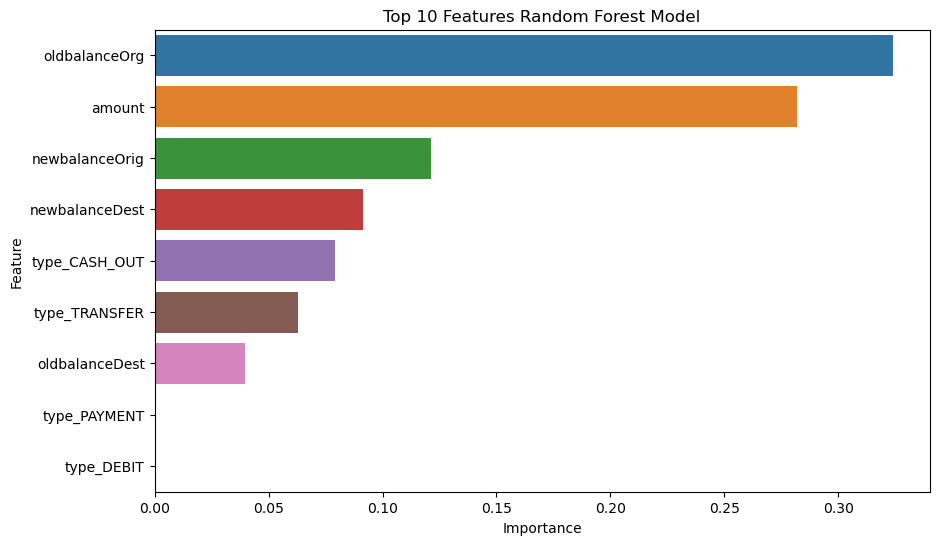

In [76]:
feature_importance = rf_clf.feature_importances_

# Create a DataFrame for feature names and their corresponding feature_importance
feature_names = X.columns  # Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()